# Analysis of the Public Threat model

> Initial results for my Public Threat model

In [1]:
#| default_exp analysis_public_threat

In [2]:
#| hide
#| export
from gh_pages_example.conditions import *
from gh_pages_example.data_utils import *
from gh_pages_example.methods import *
from gh_pages_example.models import *
from gh_pages_example.model_utils import *
from gh_pages_example.payoffs import *
from gh_pages_example.plot_utils import *
from gh_pages_example.types import *
from gh_pages_example.utils import *

import copy
import typing
import warnings

import chaospy
import fastcore.test
import ipywidgets
from ipywidgets import interact
import matplotlib as mpl
import matplotlib.pyplot as plt
from nbdev.showdoc import *
import nptyping
import numpy as np
import pandas
import scipy
import seaborn as sns

/home/ethos/git/gh-pages-example/gh_pages_example/model_utils.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (ind not in allowed_inds) and (str(ind) not in allowed_inds):


here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n_models:  2
M:  (2, 8, 8)
here2
here3
here4
ρ:  (2,)
n

/home/ethos/git/gh-pages-example/gh_pages_example/methods.py:260: ComplexWarning: Casting complex values to real discards the imaginary part
  ergodic = np.array(V.transpose(0, 2, 1)[y], dtype=float)


In [241]:
@method(build_payoffs, "dsair_with_punishment_v1")
def build_payoffs(models):
    """The payoffs of a DSAIR race where punishments are levied."""
    names1 = ['b', 'c', 's', 'p', 'B', 'W']
    names2 = ['pfo_l', 'pfo_h', 'λ', 'r_l', 'r_h', 'g']
    b, c, s, p, B, W = [models[k] for k in names1]
    pfo_l, pfo_h, λ, r_l, r_h, g = [models[k] for k in names2]
    collective_risk = models.get('collective_risk', 0)
    risk_shared = (1 - (1-p)*collective_risk)
    
    k = models.get('decisiveness', 100)
    
    # # Speed impact of regulators when they catch 1 or 2 safety violators
    # phi_h = models.get('phi_h', 1/s)
    # phi2_h = models.get('phi2_h,', 1/s)
    # # Tullock contest to determine which firm wins after
    # # one safety violator is caught
    # caught_loses_h = ((s * phi_h)**k + 1)**(-1)
    # # Tullock contest to determine whether any firm wins if they are both
    # # safety violators who were caught by the regulator
    # both_caught_fail_h = ((s * phi2_h)**k + 1)**(-1)
    
    # Π_h11 = B / (2*W) + b/2 - c
    # Π_h12 = ((1 - pfo_h) * b / (s+1) * risk_shared
    #          + pfo_h * caught_loses_h * (b + B / W)
    #          - c)
    # Π_h21 = (p * (1 - pfo_h) * (s*b / (s + 1) + s * B / W)
    #          + (pfo_h * (1 - caught_loses_h)
    #             * p * (s*b / (s + 1) + s * B / W)))
    # Π_h22 = (p * (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * risk_shared
    #          + (pfo_h**2 * (1 - both_caught_fail_h)
    #             * p * (b/2 + s*B/(2*W))))
    
    
    # Win impact of regulators when they catch 1 or 2 safety violators
    phi_h = models.get('phi_h', 1/s)
    phi2_h = models.get('phi2_h,', 1/s)
    # Speed impact of regulators when they catch 1 or 2 safety violators
    theta_h = models.get('theta_h', 1/s)
    theta2_h = models.get('theta2_h,', 1/s)
    # Risk impact of regulators when they catch 1 or 2 safety violators
    gamma_h = models.get('gamma_h', phi_h)
    gamma2_h = models.get('gamma2_h', phi2_h)
    # Tullock contest to determine which firm wins after
    # one safety violator is caught
    caught_loses_h = ((s * phi_h)**k + 1)**(-1)
    # Tullock contest to determine whether any firm wins if they are both
    # safety violators who were caught by the regulator
    both_caught_fail_h = ((s * phi2_h)**k + 1)**(-1)
    risk_shared_reg2_h = (1 - (1-p)*collective_risk * gamma2_h)
    
    Π_h11 = B / (2*W) + b/2 - c
    Π_h12 = ((1 - pfo_h) * b / (s+1) * risk_shared
             + pfo_h * caught_loses_h * (b + B / W)
             - c)
    Π_h21 = (p * (1 - pfo_h) * (s*b / (s + 1) + s * B / W)
             + ((1 - (1 - p) * gamma_h)
                * pfo_h * (1 - caught_loses_h)
                * theta_h * s
                * B / W))
    Π_h22 = (p * (1 - pfo_h**2) * (b/2 + s*B/(2*W)) * risk_shared
             + ((1 - (1 - p) * gamma2_h) * risk_shared_reg2_h
                * pfo_h**2 * (1 - both_caught_fail_h)
                * theta2_h * s
                * B/(2*W)))
    
    payoffs = {}
    payoffs['1-1'] = {'P1': Π_h11,
                      'P2': Π_h11}
    payoffs['1-2'] =  {'P1': Π_h21,
                       'P2': Π_h12}
    payoffs['2-1'] =  {'P1': Π_h12,
                       'P2': Π_h21}
    payoffs['2-2'] =  {'P1': Π_h22,
                       'P2': Π_h22}
    
    return {**models, "payoffs": payoffs}

@method(build_payoffs, "public_threat_level_v1")
def build_payoffs(models):
    """The payoffs of a DSAIR race where punishments are levied when
    the public threat level is sufficiently high. The public threat
    level depends on the state of the population."""
    models1 = copy.deepcopy(models)
    # models1['phi_h'] = models.get('phi_h', 1/models["s"])
    # models1['phi2_h'] = models.get('phi2_h', 1/models["s"])
    # models1['theta_h'] = models.get('theta_h', models1['phi_h'])
    # models1['theta2_h'] = models.get('theta2_h',models1['phi2_h'])
    # models1['gamma_h'] = models.get('gamma_h', models1['phi_h'])
    # models1['gamma2_h'] = models.get('gamma2_h', models1['phi2_h'])
    
    ones = models['s']**0
    models2 = copy.deepcopy(models)
    models2['phi_h'] = ones
    models2['phi2_h'] = ones
    models2['theta_h'] = ones
    models2['theta2_h'] = ones
    models2['gamma_h'] = ones
    models2['gamma2_h'] = ones
    
    payoffs1 = thread_macro({**models1,
                             "payoffs_key": "dsair_with_punishment_v1",},
                            build_payoffs,
                            (get, "payoffs"))
    payoffs2 = thread_macro({**models2,
                             "payoffs_key": "dsair_with_punishment_v1",},
                            build_payoffs,
                            (get, "payoffs"))
    payoffs = {"severity-1": payoffs1, "severity-2": payoffs2}
    return {**models, "payoffs": payoffs}

@multi
def evaluate_payoffs(models):
    return models.get("payoffs_key")

@method(evaluate_payoffs, "public_threat_level_v1")
def evaluate_payoffs(models):
    names1 = ["profile", "player", "payoffs", "population_state"]
    names2 = ["Z", "severity"]
    profile, player, payoffs, population_state = [models[k] for k in names1]
    Z, severity = [models[k] for k in names2]
    strategy_counts = population_state['strategy_counts']
    unsafe_frequency = strategy_counts.get("1", 0)
    if unsafe_frequency > severity * Z["S1"]:
        payoffs = payoffs["severity-1"]
    else:
        payoffs = payoffs["severity-2"]
    return payoffs[profile][player]

In [242]:
Z = {"S1": 50}
β = 1
sector_strategies = {"S1": [1, 2], }
allowed_sectors = {"P2": ["S1"],
                   "P1": ["S1"], }
models = {"dispatch-type": 'multiple-populations',
          "payoffs_key": "public_threat_level_v1",
          "β": β,
          "Z": Z,
          "allowed_sectors": allowed_sectors,
          "sector_strategies": sector_strategies,
          "compute_success_rule": "functional",
          "payoffs_function": evaluate_payoffs,
          }
models['pfo'] = 0 # We need this parameter to calculate some analytical boundaries.

In [304]:
models_baseline = {**models,
                   **build_reg_market(pfo_h=0.8,
                                      phi_h=1,
                                      phi2_h=1,
                                      β = 0.02, # np.arange(0.01, 0.1, 0.01)
                                      strategy_set=["AS","AU"],
                                      )
                   }
models_baseline['β'] = {"S1": models_baseline['β']}
models_baseline['severity'] = 1
models_baseline['decisiveness'] = 100
models_baseline['n_models'] = models_baseline['s'].shape[0]
# Optionally, we can choose to scale the regulator's impact by the speed advantage.
ones = models_baseline['s']**0
models_baseline['phi_h'] = models_baseline['phi_h']  / models_baseline['s']
models_baseline['phi2_h'] = models_baseline['phi2_h'] / models_baseline['s']
models_baseline['theta_h'] = ones  / models_baseline['s']
models_baseline['theta2_h'] = ones / models_baseline['s']
models_baseline['gamma_h'] = ones * 0
models_baseline['gamma2_h'] = ones * 0
results_baseline = thread_macro({**models_baseline,
                                 "sd-method": "quantecon",
                                 },
                                payoffs_sr,
                                threshold_society_prefers_safety_dsair,
                                create_profiles,
                                apply_profile_filters,
                                build_payoffs,
                                build_transition_matrix,
                                find_ergodic_distribution,
                                calculate_sd_helper,
                                )
df_baseline = thread_macro(results_baseline,
                           results_to_dataframe_egt,
                           process_dsair_data)

here
here2
here3
here4
ρ:  (2091,)
n_models:  2091
M:  (2091, 2, 2)
here
here2
here3
here4
ρ:  (2091,)
n_models:  2091
M:  (2091, 2, 2)


/home/ethos/git/gh-pages-example/gh_pages_example/conditions.py:39: RuntimeWarning: invalid value encountered in divide
  (-b + (b**2 - 4*a*c)**0.5)/(2*a))
/home/ethos/git/gh-pages-example/gh_pages_example/conditions.py:42: RuntimeWarning: divide by zero encountered in divide
  (-b - (b**2 - 4*a*c)**0.5)/(2*a))
/home/ethos/git/gh-pages-example/gh_pages_example/methods.py:492: RuntimeWarning: Some of the entries in the transition matrix are close to 1 (with a tolerance of 1e-11). This could result in more than one eigenvalue of magnitute 1 (the Markov Chain is degenerate), so please be careful when analysing the results.
  warn(


In [305]:
df_baseline

,s,p,b,c,B,W,pfo_l,pfo_h,λ,r_l,...,collective_risk,theta_h,theta2_h,gamma_h,gamma2_h,threshold_society_prefers_safety,threshold_society_prefers_safety_alt,AS_frequency,AU_frequency,pr
0,1.0,0.00,4,1,10000,100,0,0.8,0,0,...,0,1.0,1.0,0.0,0.0,0.019231,0.019231,1.000000e+00,2.920345e-20,1.00
1,1.0,0.02,4,1,10000,100,0,0.8,0,0,...,0,1.0,1.0,0.0,0.0,0.019231,0.019231,1.000000e+00,7.455961e-20,0.98
2,1.0,0.04,4,1,10000,100,0,0.8,0,0,...,0,1.0,1.0,0.0,0.0,0.019231,0.019231,1.000000e+00,1.903588e-19,0.96
3,1.0,0.06,4,1,10000,100,0,0.8,0,0,...,0,1.0,1.0,0.0,0.0,0.019231,0.019231,1.000000e+00,4.860070e-19,0.94
4,1.0,0.08,4,1,10000,100,0,0.8,0,0,...,0,1.0,1.0,0.0,0.0,0.019231,0.019231,1.000000e+00,1.240829e-18,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,5.0,0.92,4,1,10000,100,0,0.8,0,0,...,0,0.2,0.2,0.0,0.0,0.797619,0.797619,9.019540e-111,1.000000e+00,0.08
2087,5.0,0.94,4,1,10000,100,0,0.8,0,0,...,0,0.2,0.2,0.0,0.0,0.797619,0.797619,2.167089e-113,1.000000e+00,0.06
2088,5.0,0.96,4,1,10000,100,0,0.8,0,0,...,0,0.2,0.2,0.0,0.0,0.797619,0.797619,5.206779e-116,1.000000e+00,0.04
2089,5.0,0.98,4,1,10000,100,0,0.8,0,0,...,0,0.2,0.2,0.0,0.0,0.797619,0.797619,1.251012e-118,1.000000e+00,0.02


In [306]:
df = df_baseline

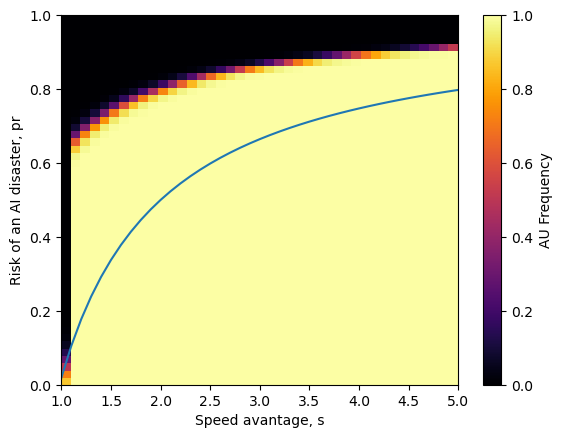

In [307]:
#| echo:false
table = df.pivot_table(index='pr', columns='s', values='AU_frequency')
plot_heatmap(table,
             xlabel='Speed avantage, s',
             ylabel='Risk of an AI disaster, pr',
             zlabel='AU Frequency',
             cmap='inferno',
            )

# Add threshold boundaries to convey dilemma region
plt.plot(table.columns, df[df.pr==1]['threshold_society_prefers_safety'])
# plt.plot(table.columns, df[df.pr==1]['threshold_risk_dominant_safety']);